# **Rainfall Weather Forecast Project**

Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:

Number of columns: 23

Date - The date of observation

Location -The common name of the location of the weather station

MinTemp -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall -The amount of rainfall recorded for the day in mm

Evaporation -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [ ]:
# Importing necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Data collection from csv file.

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
# Checking shape of dataset.
data.shape

(8425, 23)

In [ ]:
# Checking the columns in the dataset.
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [ ]:
# Checking the unique values in dataset.
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

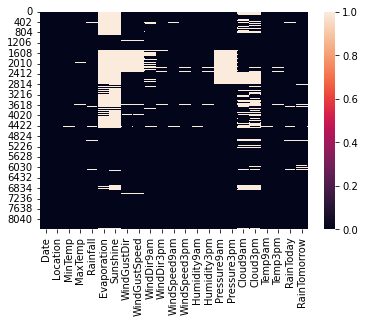

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
# Checking the object data type columns for filling the null values.
null = data.select_dtypes(include=['object']).columns
print(null)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
# Checking the float data type columns for filling the null values.

num = data.select_dtypes(include=['float']).columns
print(num)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [ ]:
# We will use mode imputation to handle missing values of categorical columns.
for i in null:
    data[i] = data[i].fillna(data[i].mode()[0])

In [ ]:
# We will use mean imputation to handle missing values of numerical columns.

for i in num:
    data[i] = data[i].fillna(data[i].mean())

In [ ]:
# Let's check the null values after handling the missing values.
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [ ]:
# Checking the null values.
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

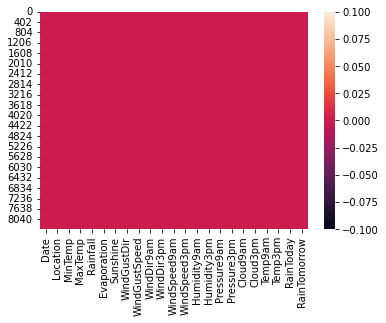

In [ ]:
# Checking the null values after handling them.
sns.heatmap(data.isnull())

In [ ]:
# Separating the Day, Month and year from Date column.

data['Day']= data['Date'].str.split('-').str[2]
data['Month']= data['Date'].str.split('-').str[1]
data['Year'] = data['Date'].str.split('-').str[0]

data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1  8.000000  4.503183   
1         WNW           44.0        NNW  ...      1007.8  4.566622  4.503183   
2         WSW           46.0          W  ...      1008.7  4.566622  2.000000   
3          NE           24.0         SE  ...      1012.8  4.566622  4.503183   
4           W           41.0        ENE  ...      1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No   01     12  2008  
1     17.2     24.3         No            No   02     12  2008  
2     21.0     23.2         No            No   03     12  2008  
3     18.1     26.5         No            No   04     12  2008  
4     17.8     29.7         No            No   05     12  2008  

[5 rows x 26 columns]

In [ ]:
# Converting the datatype for newly created features

data['Day'] = data['Day'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [ ]:
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

# **Exploratory Data Analysis**

### **Univariate Data Analysis**

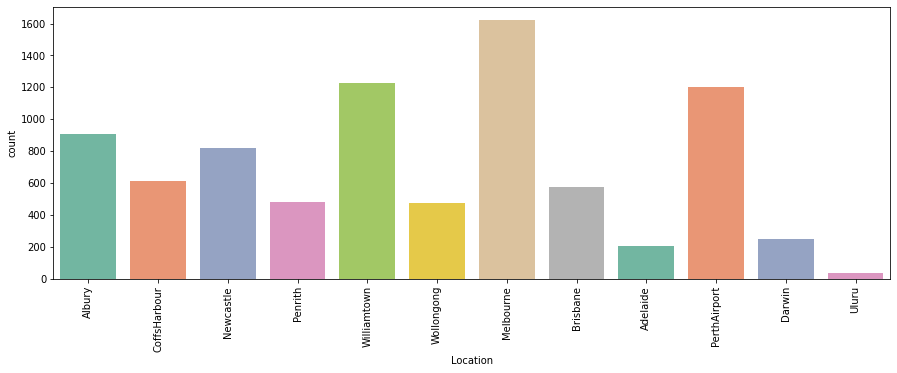

In [ ]:
# Visualizing 'Location' column using countplot.
plt.figure(figsize=(15,5))
sns.countplot(data['Location'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

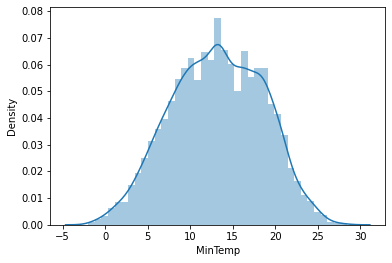

In [ ]:
# Visualizing 'MinTemp' column using distplot.
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['MinTemp'])

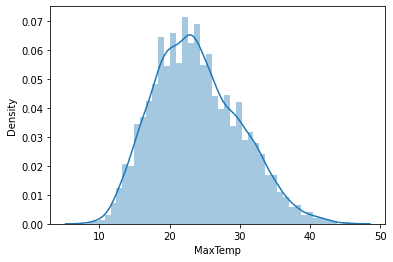

In [ ]:
# Visualizing 'MaxTemp' column using distplot.

sns.distplot(data['MaxTemp'])

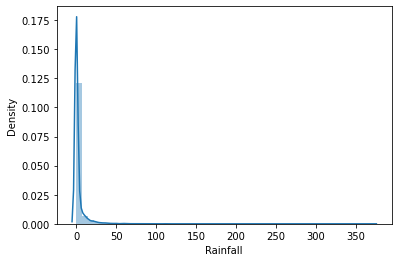

In [ ]:
# Visualizing 'Rainfall' column using distplot.

sns.distplot(data['Rainfall'])

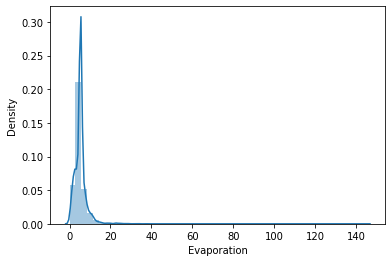

In [ ]:
# Visualizing 'Evaporation' column using distplot.

sns.distplot(data['Evaporation'])

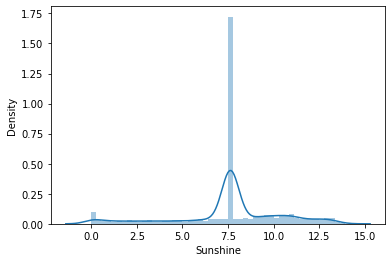

In [ ]:
# Visualizing 'Sunshine' column using distplot.

sns.distplot(data['Sunshine'])

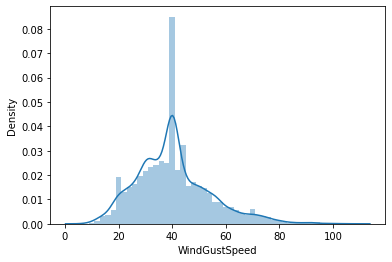

In [ ]:
# Visualizing 'WindGustSpeed' column using distplot.

sns.distplot(data['WindGustSpeed'])

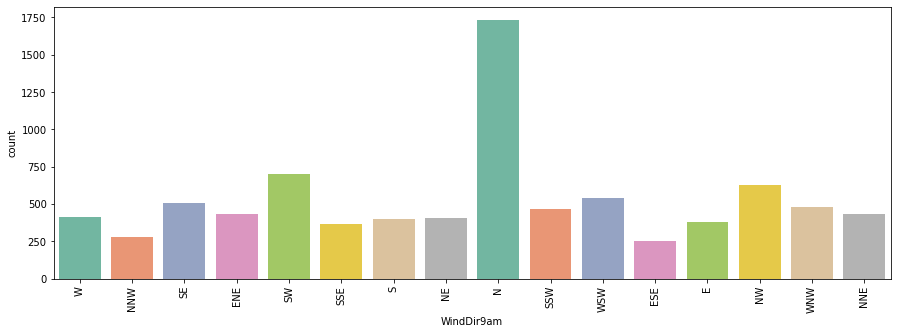

In [ ]:
# Visualizing 'WindDir9am' column using countplot.

plt.figure(figsize=(15,5))
sns.countplot(data['WindDir9am'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

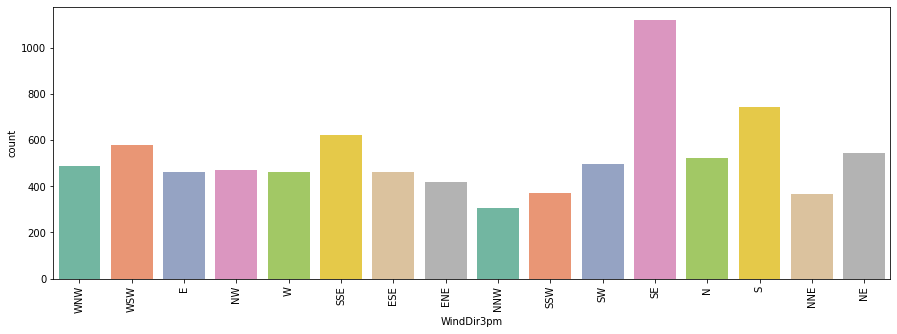

In [ ]:
# Visualizing 'WindDir3pm' column using countplot.
plt.figure(figsize=(15,5))
sns.countplot(data['WindDir3pm'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

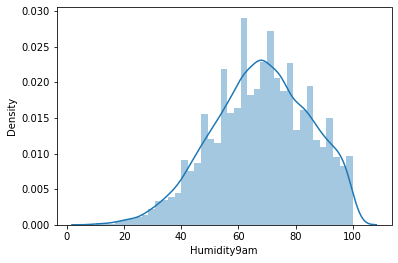

In [ ]:
sns.distplot(data['Humidity9am'])

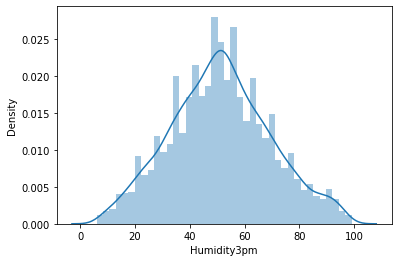

In [ ]:
sns.distplot(data['Humidity3pm'])

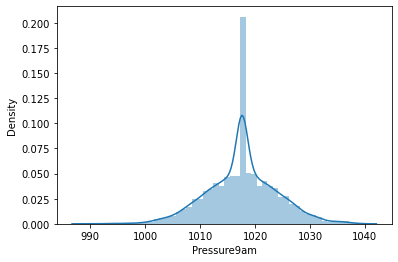

In [ ]:
sns.distplot(data['Pressure9am'])

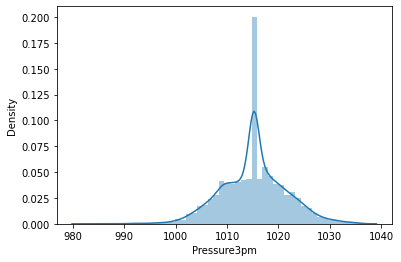

In [ ]:
sns.distplot(data['Pressure3pm'])

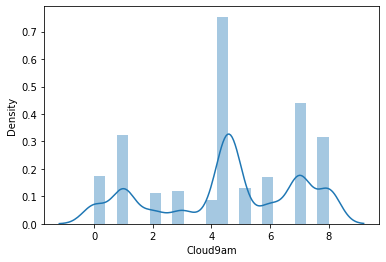

In [ ]:
sns.distplot(data['Cloud9am'])

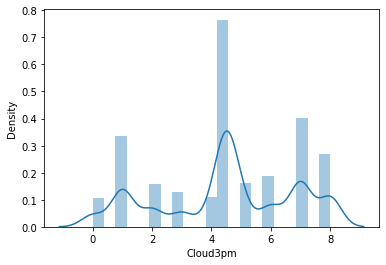

In [ ]:
sns.distplot(data['Cloud3pm'])

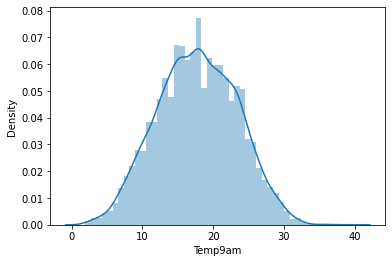

In [ ]:
sns.distplot(data['Temp9am'])

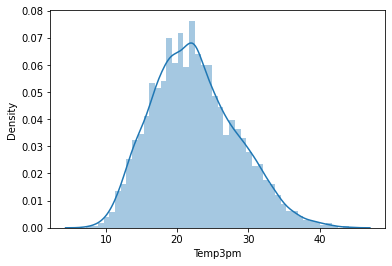

In [ ]:
sns.distplot(data['Temp3pm'])

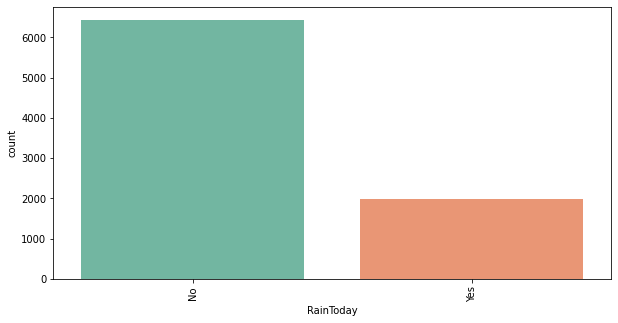

In [ ]:
# Visualizing 'RainToday' column using countplot.
plt.figure(figsize=(10,5))
sns.countplot(data['RainToday'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

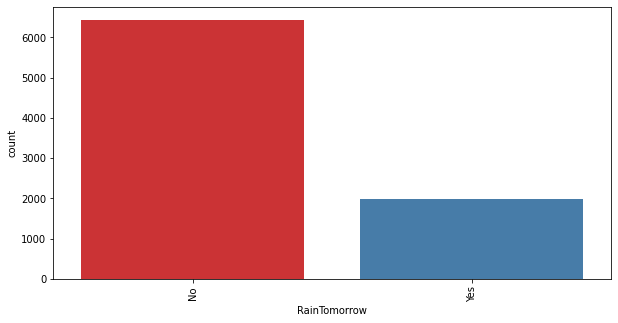

In [ ]:
# Visualizing 'RainTomorrow' column using countplot.
plt.figure(figsize=(10,5))
sns.countplot(data['RainTomorrow'], palette='Set1')
plt.xticks(rotation=90)
plt.show()

# **Observations for Univariate data analysis**:

1. High Rainfall is predicted for 'Mellbourne'location then for 'Williamtown' and 'PerthAirport'and lowest is predicted for 'Uluru' then 'Darwin'.
2.'MinTemp' column shows normal curve having range 5 to 20.
3.'MaxTemp' column also shows normal curve having range 20 to 30.
4.'Rainfall' column shows most of the data points are concentrated near zero that means the column contains skewness.
5.'Evaporation' column also shows that most of the values lies near zero and it shows skewness.
6.'Sunshine' column shows a small normal curve with median at 7.5.
7.'WindGustSpeed' columns shows somewhat normal trend but little bit skewness with range 20-60.
8.'WindDir9am' column shows wind speed is mostly in North direction and less in NW and ESE at 9 am.
9.'WindDir3pm' column shows wind direction is mostly SE and less in NNW.
10.'Humidity9am' column shows somewhat skewness with range 40-80.
11.'Humidity3pm' column shows normal curve with most humidity in range 40-80 at 3pm.
12.'Pressure9am' column shows somewhat normal curve.
13.'Pressure3pm' column shows same normal curve as 'Pressure3pm'.
14.Both 'Cloud9am' and 'Cloud3pm' shows almost same curve.
15.Both 'Temp9am' and 'Temp3pm' shows perfect normal curve.
16.'RainToday' column shows mostly rainfall.
17.'RainTomorrow' column shows less rainfall in majority.

We will combine 'WindSpeed9am' and 'WindSpeed3pm','Humidity9am' and 'Humidity3pm', 'Cloud9am' and 'Cloud3pm', 'Temp9am' and 'Temp3pm', 'Pressure9am' and 'Pressure3pm' columns into average of them as they have equal values.

In [ ]:
data['Avg_WindSpeed']=(data['WindSpeed9am']+data['WindSpeed3pm'])/2

data['Avg_Humidity']=(data['Humidity9am']+data['Humidity3pm'])/2

data['Avg_Cloud']=(data['Cloud9am']+data['Cloud3pm'])/2

data['Avg_Temp'] = (data['Temp9am']+data['Temp3pm'])/2

data['Avg_Pressure']=(data['Pressure9am']+data['Pressure3pm'])/2

In [ ]:
# Dropping the irrelevent columns after getting their average.
data = data.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)


In [ ]:
# Checking dataset after dropping columns.
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Day', 'Month', 'Year', 'Avg_WindSpeed', 'Avg_Humidity',
       'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure'],
      dtype='object')

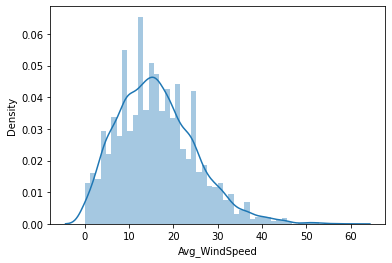

In [ ]:
sns.distplot(data['Avg_WindSpeed'])

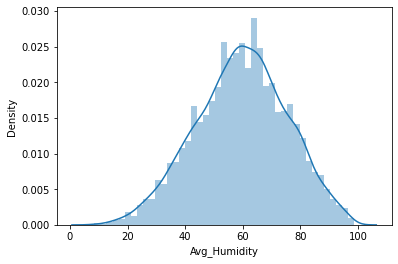

In [ ]:
sns.distplot(data['Avg_Humidity'])

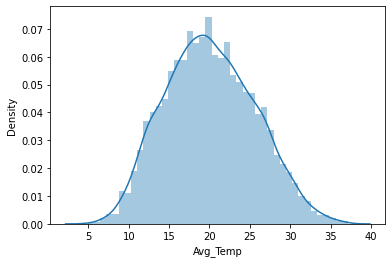

In [ ]:
sns.distplot(data['Avg_Temp'])

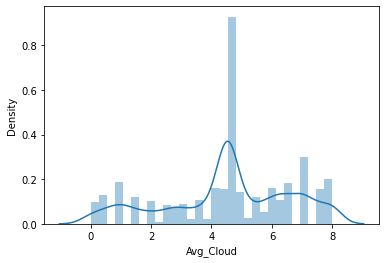

In [ ]:
sns.distplot(data['Avg_Cloud'])

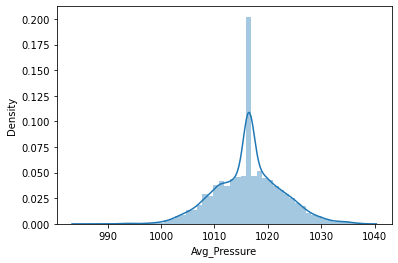

In [ ]:
sns.distplot(data['Avg_Pressure'])

## **Bi-variate Data Analysis**

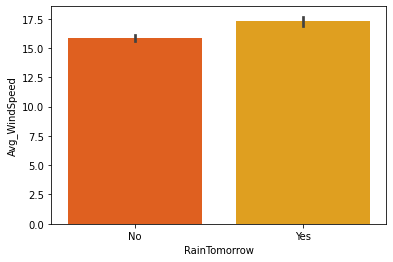

In [ ]:
# Visualizing 'Avg_Speed vs RainTomorrow' using barplot.
sns.barplot(y='Avg_WindSpeed', x='RainTomorrow', data = data, palette='autumn')

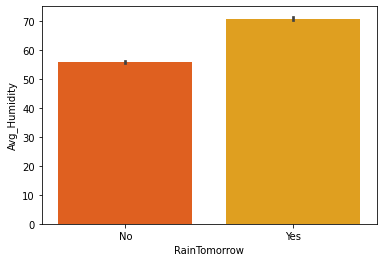

In [ ]:
# Visualizing 'Avg_Humidity vs RainTomorrow' using barplot.
sns.barplot(y='Avg_Humidity', x='RainTomorrow', data = data, palette='autumn')

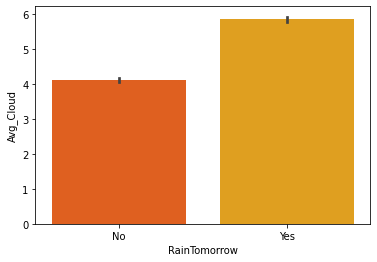

In [ ]:
# Visualizing 'Avg_cloud vs RainTomorrow' using barplot.
sns.barplot(y='Avg_Cloud', x='RainTomorrow', data = data,palette='autumn')

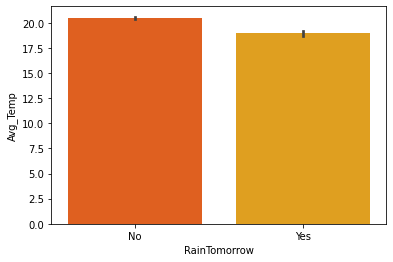

In [ ]:
# Visualizing 'Avg_Temp vs RainTomorrow' using barplot.
sns.barplot(y='Avg_Temp', x='RainTomorrow', data = data, palette='autumn')

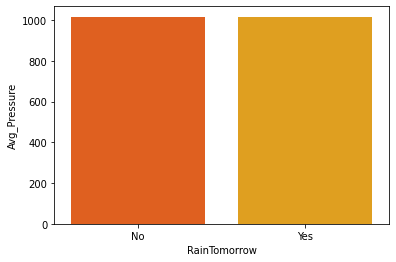

In [ ]:
# Visualizing 'Avg_Pressure vs RainTomorrow' using barplot.
sns.barplot(y='Avg_Pressure', x='RainTomorrow', data = data, palette='autumn')

## **Observations for Bivariate Data Analysis**

1. Avg_WindSpeed has maximum rainfall for Tomorrow.
2. Avg_Humidity shows maximum rainfall for RainTomorrow.
3. Avg_cloud shows maximum rainfall for RainTomorrow.
4. Avg_Temp shows less rainfall for RainTomorrow.
5. Avg_Pressure shows same Rainfall for RainTomorrow.

# **Data Encoding**

In [ ]:
# Encoding Dataset using label encoder.

from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

# Recognizing object data type columns for label encoding.
obj = data.select_dtypes(include=['object']).columns


In [ ]:
for i in obj:
    data[i] = la.fit_transform(data[i])

In [ ]:
# Checking the dataset after encoding.
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  RainToday  RainTomorrow  Day  Month  \
0           44.0          13          14          0             0    1     12   
1           44.0           6          15          0             0    2     12   
2           46.0          13          15          0             0    3     12   
3           24.0           9           0          0             0    4     12   
4           41.0           1           7          0             0    5     12   

   Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  Avg_Temp  Avg_Pressure  
0  2008           22.0          46.5   6.251591     19.35       1007.40  
1  2008           13.0          34.5   4.534902     20.75       1009.20  
2  2008           22.5          34.0   3.283311     22.10       1008.15  
3  2008           10.0          30.5   4.534902     22.30       1015.20  
4  2008           13.5          57.5   7.500000     23.75       1008.40

We have successfully encoded the categorical columns of the dataset.

<Figure size 2880x4320 with 0 Axes>

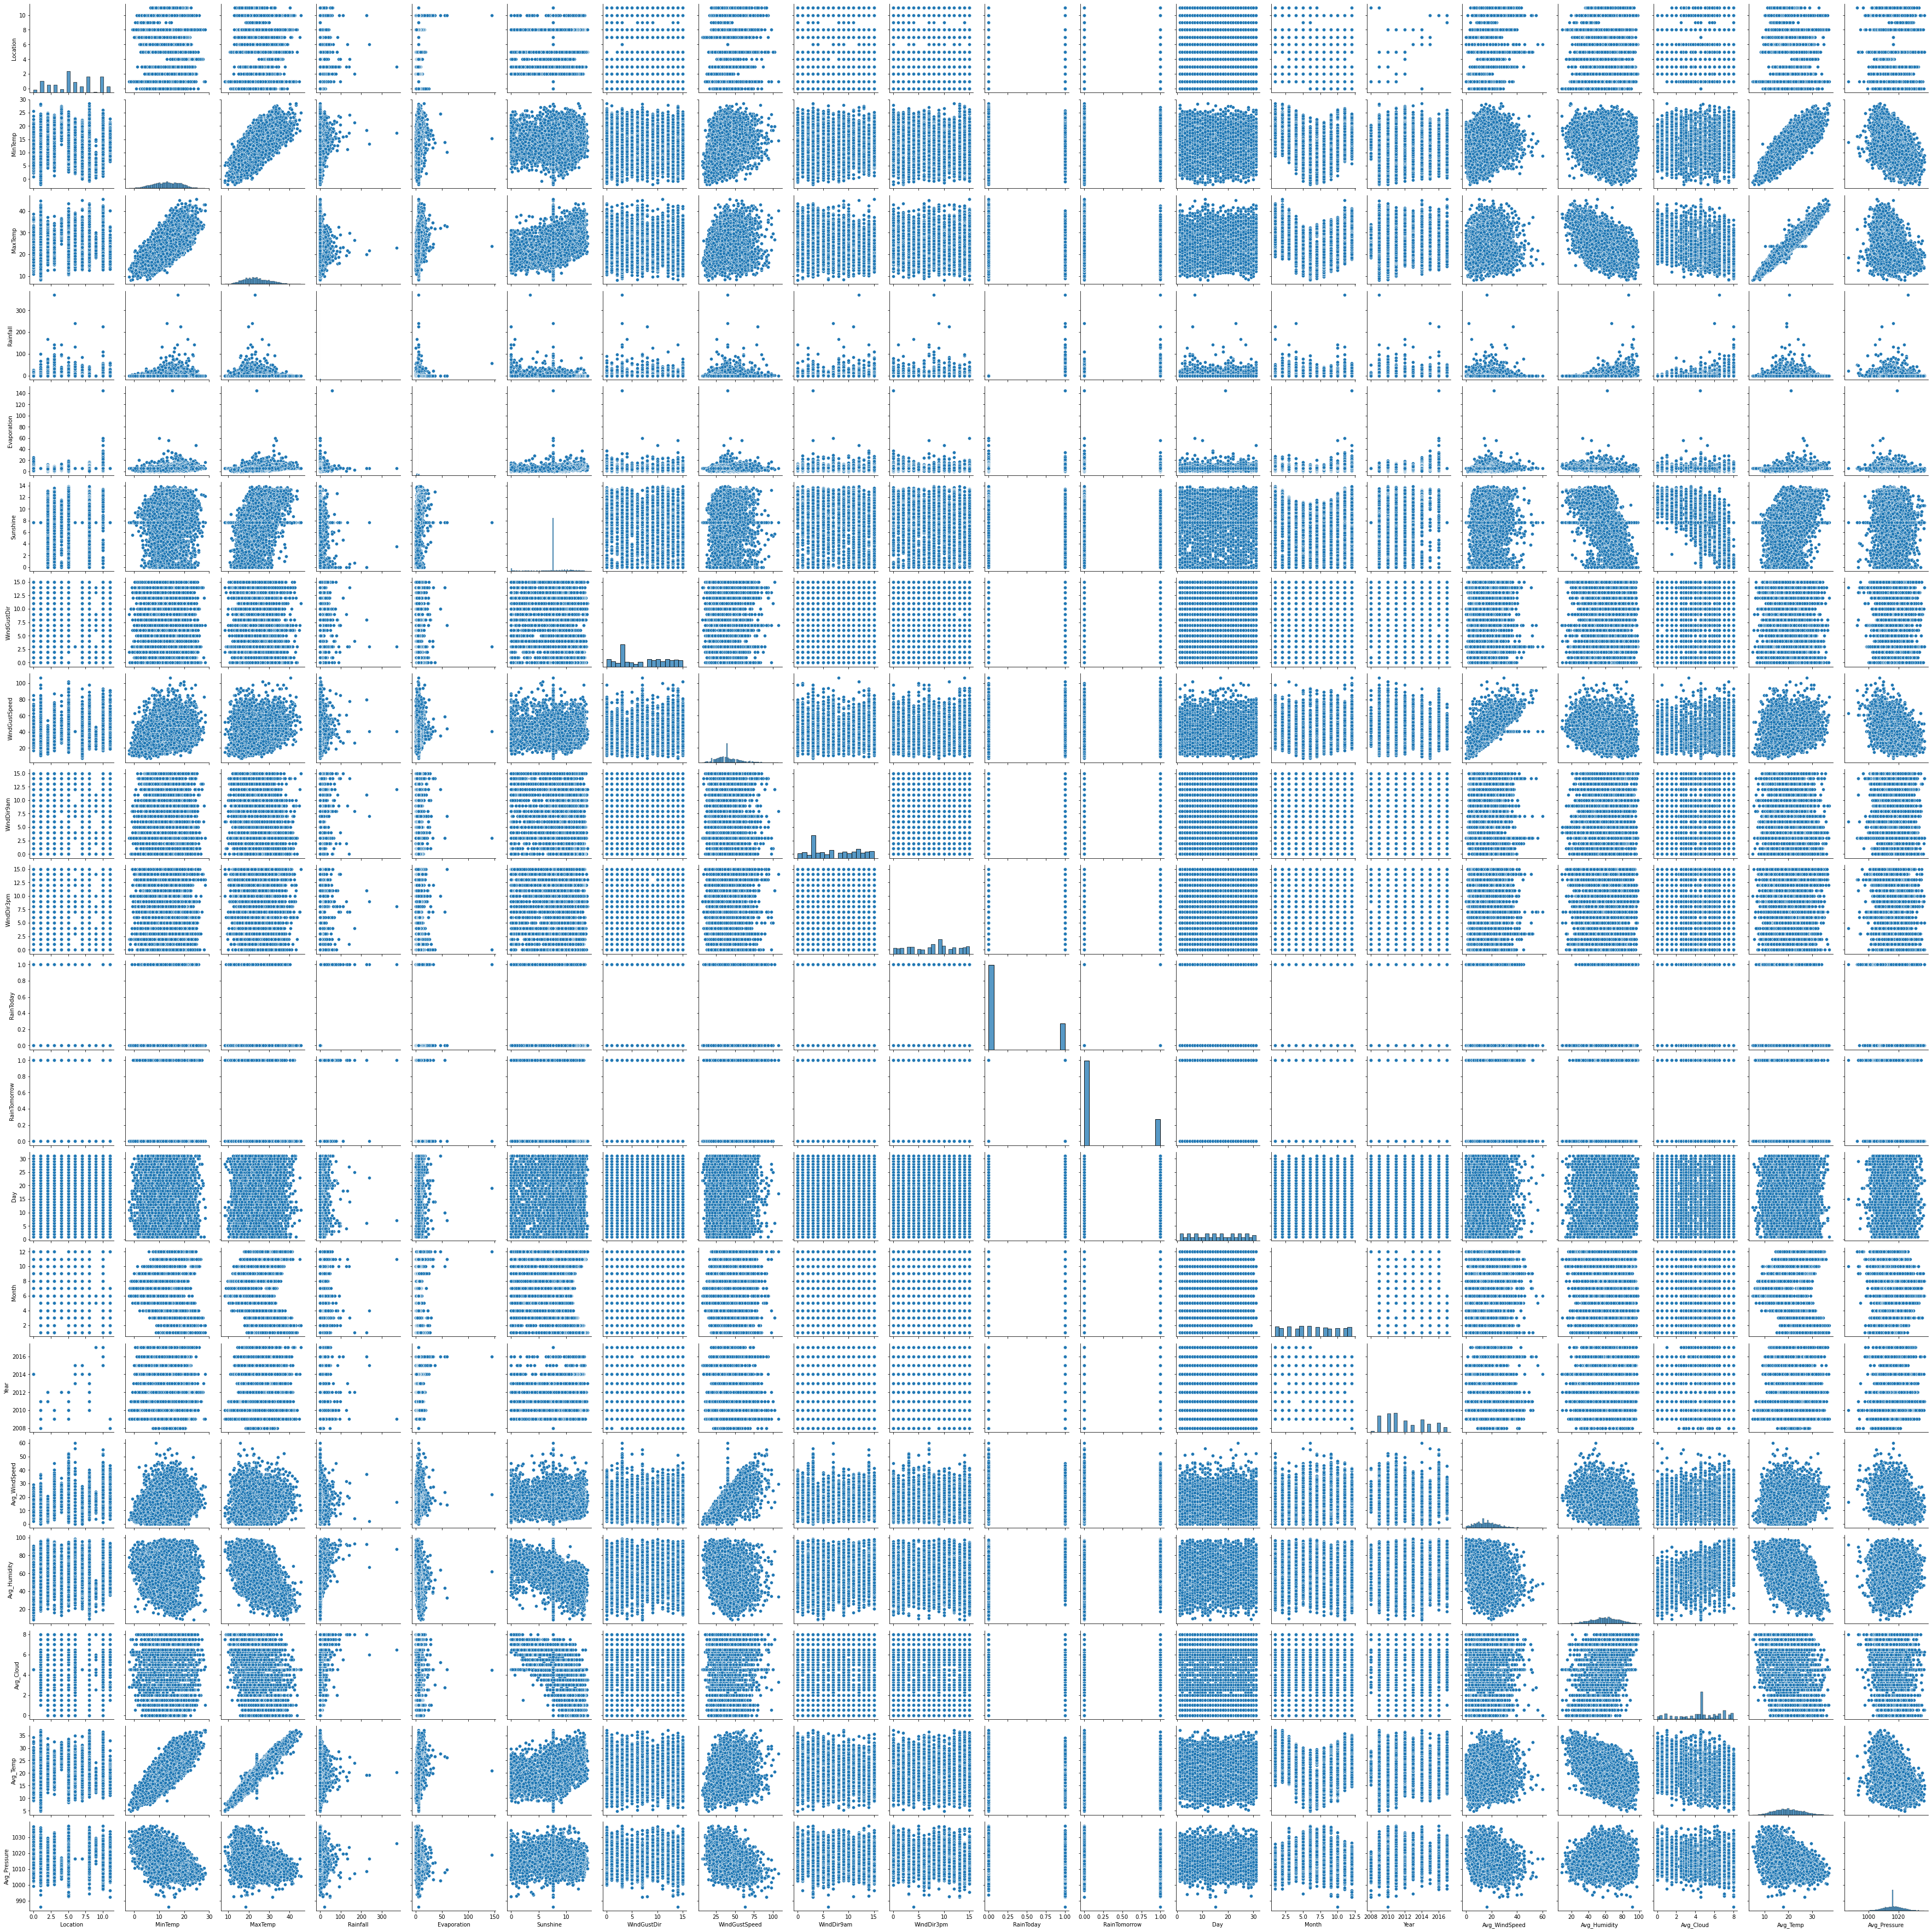

In [ ]:
# Multivariate Analysis using pairplot.

plt.figure(figsize=(40,60))
sns.pairplot(data)
plt.show()

## **Checking the correlation**

In [ ]:
data.corr()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.007693     0.143519  0.057817   
MinTemp        0.116531  1.000000  0.717522  0.087684     0.254965  0.056184   
MaxTemp        0.064268  0.717522  1.000000 -0.087451     0.322405  0.378403   
Rainfall       0.007693  0.087684 -0.087451  1.000000     0.023517 -0.169432   
Evaporation    0.143519  0.254965  0.322405  0.023517     1.000000  0.226001   
Sunshine       0.057817  0.056184  0.378403 -0.169432     0.226001  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.038812    -0.078765 -0.105918   
WindGustSpeed  0.231396  0.230058  0.139998  0.086000     0.136371 -0.013778   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093821    -0.061677 -0.076560   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038560    -0.047952 -0.068553   
RainToday      0.003071  0.064789 -0.224883  0.461106    -0.088654 -0.234230   
RainTomorrow   0.002824  0.092942 -0.152886  0.220021    -0.059012 -0.327731   
Day           -0.002019  0.009446  0.015608 -0.013760     0.013597  0.004662   
Month         -0.082407 -0.245854 -0.163253 -0.012244     0.004362 -0.006694   
Year           0.486405  0.044123  0.119772  0.006435     0.152708  0.065374   
Avg_WindSpeed  0.256365  0.177908  0.056534  0.043000     0.116302  0.006252   
Avg_Humidity   0.035209 -0.023504 -0.450397  0.256968    -0.206064 -0.445071   
Avg_Cloud      0.031629  0.074073 -0.284064  0.189950    -0.095241 -0.608636   
Avg_Temp       0.092380  0.817991  0.962593 -0.052320     0.324043  0.339461   
Avg_Pressure  -0.026704 -0.430397 -0.367873 -0.053770    -0.185442 -0.006920   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday  \
Location         -0.035408       0.231396   -0.027103   -0.027736   0.003071   
MinTemp          -0.145316       0.230058   -0.041650   -0.147166   0.064789   
MaxTemp          -0.224670       0.139998   -0.214119   -0.180622  -0.224883   
Rainfall          0.038812       0.086000    0.093821    0.038560   0.461106   
Evaporation      -0.078765       0.136371   -0.061677   -0.047952  -0.088654   
Sunshine         -0.105918      -0.013778   -0.076560   -0.068553  -0.234230   
WindGustDir       1.000000       0.016591    0.403562    0.505799   0.125188   
WindGustSpeed     0.016591       1.000000   -0.072058    0.071235   0.076822   
WindDir9am        0.403562      -0.072058    1.000000    0.249527   0.157324   
WindDir3pm        0.505799       0.071235    0.249527    1.000000   0.100125   
RainToday         0.125188       0.076822    0.157324    0.100125   1.000000   
RainTomorrow      0.051832       0.190127    0.032860    0.008918   0.312929   
Day               0.015683      -0.002876   -0.015154    0.003089  -0.015281   
Month             0.034823       0.051968    0.012544    0.029384  -0.000801   
Year             -0.088340      -0.042402   -0.014498   -0.005812  -0.011282   
Avg_WindSpeed     0.067093       0.698646    0.057470    0.053121   0.028997   
Avg_Humidity      0.050219      -0.195637    0.085463   -0.012479   0.405241   
Avg_Cloud         0.122656       0.056579    0.092133    0.073257   0.298530   
Avg_Temp         -0.217714       0.157450   -0.171355   -0.188159  -0.175444   
Avg_Pressure     -0.068209      -0.393791    0.031317   -0.091199  -0.070049   

               RainTomorrow       Day     Month      Year  Avg_WindSpeed  \
Location           0.002824 -0.002019 -0.082407  0.486405       0.256365   
MinTemp            0.092942  0.009446 -0.245854  0.044123       0.177908   
MaxTemp           -0.152886  0.015608 -0.163253  0.119772       0.056534   
Rainfall           0.220021 -0.013760 -0.012244  0.006435       0.043000   
Evaporation       -0.059012  0.013597  0.004362  0.152708       0.116302   
Sunshine          -0.327731  0.004662 -0.006694  0.065374       0.006252   
WindGustDir        0.051832  0.015683  0.034823 -0.088340       0.067093   
WindGustSpeed      0.190127 -0.002876  0.0519

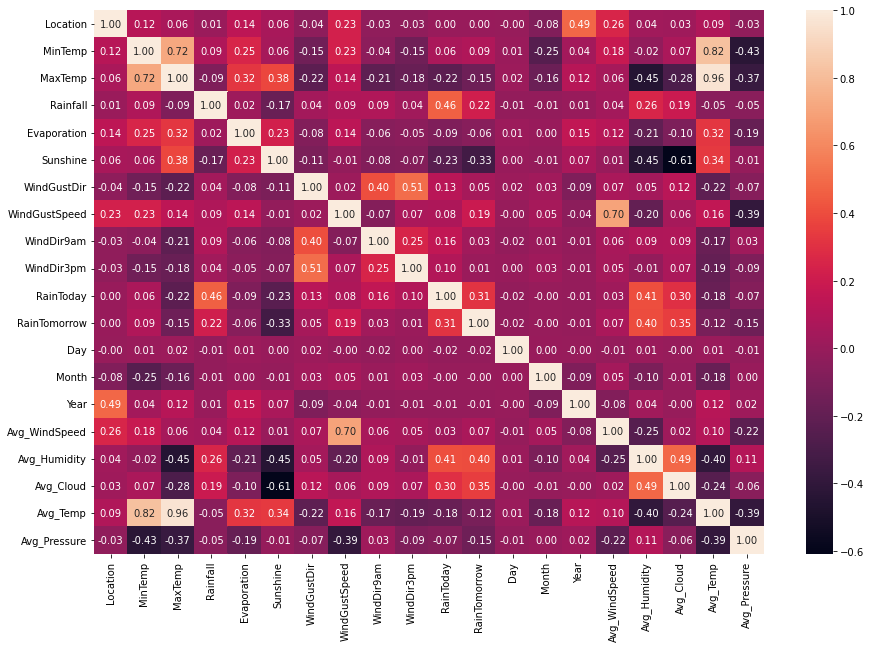

In [ ]:
# Visualizing correlation using heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='rocket',fmt='0.2f')
plt.show()

Here Avg_Temp and MinTemp shows Highest correlation of 0.82, Avg_Temp and MaxTemp shows highest correlation of 0.96, also WindGustSpeed and Avg_WindSpeed shows highest correlation of 0.72.

## **Separating Dataset into Feature and Target for 'RainTomorrow' for Prediction**

In [ ]:
# x=Features and y=Target.

x = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

In [ ]:
# Checking the shape of x and y.
print(x.shape)
print(y.shape)

(8425, 19)
(8425,)


## **Checking Skewness**

In [ ]:
x.skew().sort_values(ascending = False)

Evaporation      14.023948
Rainfall         13.218403
RainToday         1.242362
WindGustSpeed     0.757000
Avg_WindSpeed     0.644306
Year              0.418663
MaxTemp           0.380654
WindDir9am        0.172792
Avg_Temp          0.170653
WindGustDir       0.119640
Month             0.039388
Avg_Pressure      0.005032
Day               0.004260
Location         -0.050456
MinTemp          -0.089989
WindDir3pm       -0.119847
Avg_Humidity     -0.151055
Avg_Cloud        -0.374727
Sunshine         -0.716525
dtype: float64

Here the columns 'Evaporation','Rainfall','RainToday','WindGustSpeed','Avg_WindSpeed' have highest skewness and we will remove it using powertransformation.

In [ ]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [ ]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

RainToday        1.242362
Rainfall         0.904387
Evaporation      0.080305
WindGustSpeed    0.010481
Avg_Pressure     0.000947
Year             0.000000
MaxTemp         -0.010591
Avg_WindSpeed   -0.023574
Avg_Temp        -0.029065
Avg_Humidity    -0.047725
Sunshine        -0.075544
MinTemp         -0.102983
WindDir9am      -0.155025
Month           -0.155749
Location        -0.186657
WindGustDir     -0.187177
Avg_Cloud       -0.192919
Day             -0.211250
WindDir3pm      -0.248689
dtype: float64

We have successfully removed the skewness from the dataset.

In [ ]:
x = pd.DataFrame(x_new, columns = x.columns)

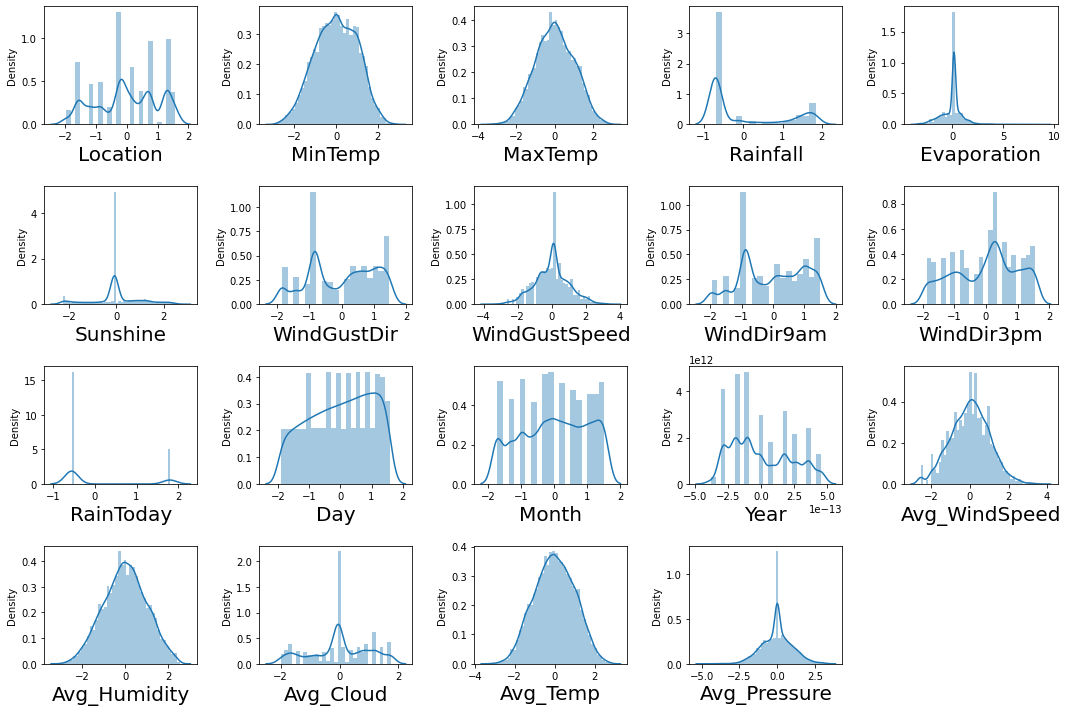

In [ ]:
# Visualizing  the skewness in the dataset.
plt.figure(figsize = (15,10))
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

## **Outlier Detection and Handling**

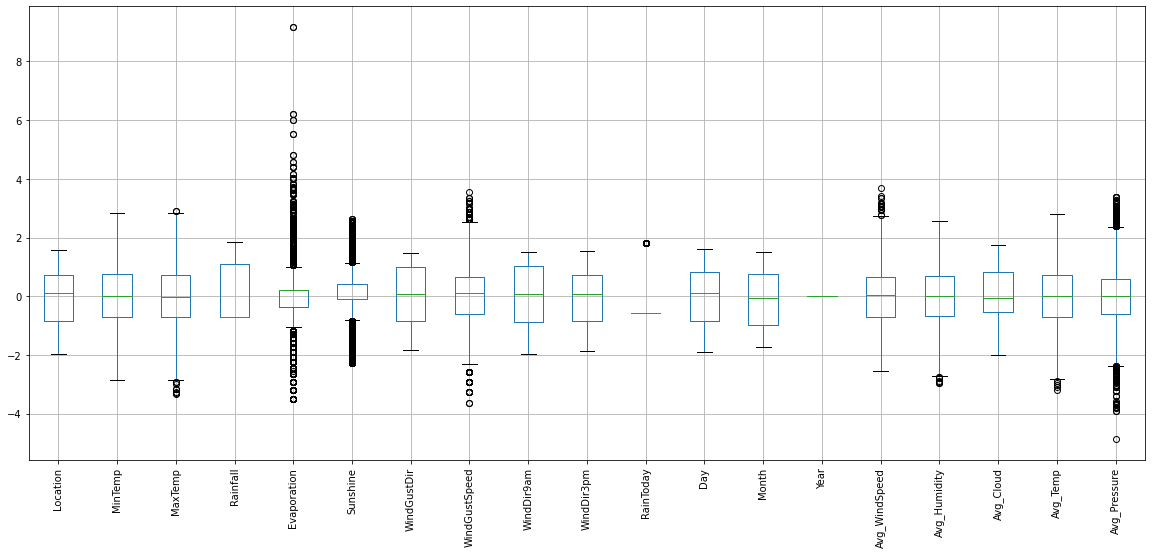

In [ ]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

Here from the above boxplot, 'MaxTemp','Evaporation','Sunshine','WindGustSpeed','RainToday','Avg_WindSpeed','Avg_Humidity','Avg_Temp','Avg_Pressure'shows the outliers

We will remove the outliersfrom each feature using IQR method.

In [ ]:
#1st Quantile
q1 = x.quantile(0.25)
#3rd quantile
q3 = x.quantile(0.75)
#IQR
iqr = q3 - q1

In [ ]:
# Checking the feature Indexes which have higher outliers.

Evaporation_out = q3.Evaporation + (1.5 * iqr.Evaporation)
feature1 = np.where(x['Evaporation']> Evaporation_out)
x = x.drop(x['Evaporation'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(7674, 19)
(7674,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

WindGustSpeed_out = q3.WindGustSpeed + (1.5 * iqr.WindGustSpeed)
feature1 = np.where(x['WindGustSpeed']> WindGustSpeed_out)
x = x.drop(x['WindGustSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(7622, 19)
(7622,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_WindSpeed_out = q3.Avg_WindSpeed + (1.5 * iqr.Avg_WindSpeed)
feature1 = np.where(x['Avg_WindSpeed']>Avg_WindSpeed_out )
x = x.drop(x['Avg_WindSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(7616, 19)
(7616,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Pressure_out = q3.Avg_Pressure + (1.5 * iqr.Avg_Pressure)
feature1 = np.where(x['Avg_Pressure']>Avg_Pressure_out )
x = x.drop(x['Avg_Pressure'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(7509, 19)
(7509,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

MaxTemp_out = q1.MaxTemp - (1.5 * iqr.MaxTemp)
feature1 = np.where(x['MaxTemp']< MaxTemp_out  )
x = x.drop(x['MaxTemp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(7501, 19)
(7501,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Evaporation_low = q1.Evaporation- (1.5 * iqr.Evaporation)
feature1 = np.where(x['Evaporation']< Evaporation_low )
x = x.drop(x['Evaporation'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6443, 19)
(6443,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

WindGustSpeed_low = q1.WindGustSpeed- (1.5 * iqr.WindGustSpeed)
feature1 = np.where(x['WindGustSpeed']< WindGustSpeed_low  )
x = x.drop(x['WindGustSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6362, 19)
(6362,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Temp_low = q1.Avg_Temp- (1.5 * iqr.Avg_Temp)
feature1 = np.where(x['Avg_Temp']< Avg_Temp_low  )
x = x.drop(x['Avg_Temp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6361, 19)
(6361,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Pressure_low = q1. Avg_Pressure- (1.5 * iqr.Avg_Pressure)
feature1 = np.where(x['Avg_Pressure']<  Avg_Pressure_low  )
x = x.drop(x['Avg_Pressure'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6300, 19)
(6300,)


In [ ]:
from scipy.stats import zscore
print('High Outliers present')
print((zscore(x)<3).all())
print('Low Outliers Present')
print((zscore(x)>-3).all())

High Outliers present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp          True
Avg_Pressure      True
dtype: bool
Low Outliers Present
Location          True
MinTemp           True
MaxTemp          False
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity     False
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool


In [ ]:
#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [ ]:
# Checking the feature Indexes which have higher outliers.

MaxTemp_out = q3.MaxTemp + (1.5 * iqr.MaxTemp)
feature1 = np.where(x['MaxTemp']> MaxTemp_out)
x = x.drop(x['MaxTemp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6296, 19)
(6296,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)
feature1 = np.where(x['MaxTemp']< MaxTemp_low  )
x = x.drop(x['MaxTemp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6278, 19)
(6278,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Temp_low = q1.Avg_Temp - (1.5 * iqr.Avg_Temp)
feature1 = np.where(x['Avg_Temp']< Avg_Temp_low)
x = x.drop(x['Avg_Temp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6265, 19)
(6265,)


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Humidity_low = q1.Avg_Humidity- (1.5 * iqr.Avg_Humidity)
feature1 = np.where(x['Avg_Humidity']< Avg_Humidity_low )
x = x.drop(x['Avg_Humidity'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6260, 19)
(6260,)


In [ ]:
from scipy.stats import zscore
print('High Outliers present')
print((zscore(x)<3).all())
print('Low Outliers Present')
print((zscore(x)>-3).all())

High Outliers present
Location          True
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
RainToday         True
Day               True
Month             True
Year              True
Avg_WindSpeed     True
Avg_Humidity      True
Avg_Cloud         True
Avg_Temp         False
Avg_Pressure      True
dtype: bool
Low Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Temp_out = q3.Avg_Temp + (1.5 * iqr.Avg_Temp)
feature1 = np.where(x['Avg_Temp']> Avg_Temp_out)
x = x.drop(x['Avg_Temp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

(6255, 19)
(6255,)


In [ ]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool
Low Side Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Temp         True
Avg_Pressure     True
dtype: bool


Here we can see that we have successfully removed the outliers

In [ ]:
# Data Loss

Data_loss = ((8425-6255)/8425)*100

Data_loss

25.7566765578635

We have successfully remove the outliers from the dataset bu tgot the percentage loss of almost 25%.

# **Data** **Scaling**

In [ ]:
# We are using StandarScaler for dataset scaling.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# **Variance Inflation Factor**

In [ ]:
# Checking the multicollinearity in dataset with VIF.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif['features'] = x.columns
vif

vif       features
0    1.593531       Location
1    6.989521        MinTemp
2   14.633397        MaxTemp
3    5.109942       Rainfall
4    1.193588    Evaporation
5    1.642327       Sunshine
6    1.546501    WindGustDir
7    1.960328  WindGustSpeed
8    1.278026     WindDir9am
9    1.443167     WindDir3pm
10   4.767002      RainToday
11   1.002824            Day
12   1.152514          Month
13   1.526477           Year
14   2.012627  Avg_WindSpeed
15   2.381139   Avg_Humidity
16   1.822565      Avg_Cloud
17  24.403893       Avg_Temp
18   1.365915   Avg_Pressure

Here we can see the strong relationship bet two columns Avg_Temp and Max_Temp, we have to remove one to handle the multicollinerity.

In [ ]:
# Dropping the 'Avg_Temp' column.
x = x.drop(['Avg_Temp'], axis=1)

x.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  -1.57287  0.041124 -0.077141  0.534236     0.195503 -0.082709     1.160646   
1  -1.57287 -1.076281  0.280346 -0.698529     0.195503 -0.082709     1.319872   
2  -1.57287 -0.051713  0.374368 -0.698529     0.195503 -0.082709     1.474872   
3  -1.57287 -0.740202  0.722385 -0.698529     0.195503 -0.082709    -0.578373   
4  -1.57287  0.800894  1.327005  0.888946     0.195503 -0.082709     1.160646   

   WindGustSpeed  WindDir9am  WindDir3pm  RainToday       Day     Month  \
0       0.380260    1.179858    1.349376  -0.556099 -1.893365  1.511409   
1       0.380260   -0.140685    1.552244  -0.556099 -1.710758  1.511409   
2       0.515699    1.179858    1.552244  -0.556099 -1.544131  1.511409   
3      -1.265782    0.473499   -1.874337  -0.556099 -1.388459  1.511409   
4       0.169468   -1.528740   -0.137530  -0.556099 -1.240995  1.511409   

           Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  Avg_Pressure  
0 -3.785861e-13       0.720439     -0.834088   0.820975     -1.461738  
1 -3.785861e-13      -0.256648     -1.554871  -0.044404     -1.170337  
2 -3.785861e-13       0.769440     -1.584206  -0.641697     -1.340310  
3 -3.785861e-13      -0.639112     -1.787793  -0.044404     -0.199654  
4 -3.785861e-13      -0.196414     -0.149109   1.478348     -1.299837

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
# Let's check the values after dropping the column.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]
vif['features'] = x.columns
vif

vif       features
0   1.591532       Location
1   3.669213        MinTemp
2   3.977359        MaxTemp
3   5.099294       Rainfall
4   1.191640    Evaporation
5   1.637798       Sunshine
6   1.545461    WindGustDir
7   1.933966  WindGustSpeed
8   1.276851     WindDir9am
9   1.441555     WindDir3pm
10  4.762022      RainToday
11  1.002804            Day
12  1.148889          Month
13  1.514214           Year
14  2.006025  Avg_WindSpeed
15  2.241931   Avg_Humidity
16  1.796431      Avg_Cloud
17  1.365245   Avg_Pressure

Here we have successfully removed the multicollinearity from the dataset.

## **Splitting the dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,stratify=y, random_state=40)

## **Model Building and Evaluation**

In [ ]:
# Importing the necessary libraries.

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy: 82.73381294964028
[[906  54]
 [162 129]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       960
           1       0.70      0.44      0.54       291

    accuracy                           0.83      1251
   macro avg       0.78      0.69      0.72      1251
weighted avg       0.81      0.83      0.81      1251



In [ ]:
# Applying RandomForest Classifier for model building and evaluation. 

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 86.65067945643486
[[914  46]
 [121 170]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       960
           1       0.79      0.58      0.67       291

    accuracy                           0.87      1251
   macro avg       0.84      0.77      0.79      1251
weighted avg       0.86      0.87      0.86      1251



In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy: 82.414068745004
[[841 119]
 [101 190]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       960
           1       0.61      0.65      0.63       291

    accuracy                           0.82      1251
   macro avg       0.75      0.76      0.76      1251
weighted avg       0.83      0.82      0.83      1251



In [ ]:
# Support Vector Classifier. 

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Accuracy: 83.61310951239008
[[915  45]
 [160 131]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       960
           1       0.74      0.45      0.56       291

    accuracy                           0.84      1251
   macro avg       0.80      0.70      0.73      1251
weighted avg       0.83      0.84      0.82      1251



In [ ]:
# Applying XGB Classifier for model building and evaluation.

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_xgb)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

Accuracy: 83.21342925659472
[[912  48]
 [162 129]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       960
           1       0.73      0.44      0.55       291

    accuracy                           0.83      1251
   macro avg       0.79      0.70      0.72      1251
weighted avg       0.82      0.83      0.82      1251



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_gbc)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

Accuracy: 82.57394084732215
[[901  59]
 [159 132]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       960
           1       0.69      0.45      0.55       291

    accuracy                           0.83      1251
   macro avg       0.77      0.70      0.72      1251
weighted avg       0.81      0.83      0.81      1251



## **Cross Validation for each model**

In [ ]:
# Checking the cross validation score for Logistic Regression.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=10)
print('Cross_validation_score for LogisticRegression is:',cvs.mean())

Cross_validation_score for LogisticRegression is: 0.8203097763578275


In [ ]:
# Checking the cross validation score for RandomForestClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=10)
print('Cross_validation_score for RandomForestClassifier is:',cvs.mean())

Cross_validation_score for RandomForestClassifier is: 0.883637571884984


In [ ]:
# Checking the cross validation score for DecisionTreeClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dt,x,y,cv=10)
print('Cross_validation_score for Decision tree classifier is:',cvs.mean())


Cross_validation_score for Decision tree classifier is: 0.8146001277955272


In [ ]:
# Checking the cross validation score for SVC.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(svc,x,y,cv=10)
print('Cross_validation_score for SVC is:',cvs.mean())

Cross_validation_score for SVC is: 0.8326221086261981


In [ ]:
# Checking the cross validation score for XGBClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(xgb,x,y,cv=10)
print('Cross_validation_score for XGBClassifier is:',cvs.mean())


Cross_validation_score for XGBClassifier is: 0.8255856869009583


In [ ]:
# Checking the cross validation score for GradientBoostingClassifier.

from sklearn.model_selection import cross_val_score
cvs=cross_val_score(gbc,x,y,cv=10)
print('Cross_validation_score for GradientBoosting Classifier is:',cvs.mean())

Cross_validation_score for GradientBoosting Classifier is: 0.8275054313099041


We choose the model on basis of lowest difference between model accuracy score and cross validation score of that model,we observe that we got less difference and good accuracy for SVC,so we will perform hyper parameter tunning for it.

## **Hyper Parameter Tunning**

In [ ]:
# Hyper parameter tunning for SVC using GridSearchCV.
from sklearn.model_selection import  GridSearchCV

params = {'C':  [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

In [ ]:
GSV = GridSearchCV(svc, param_grid = params)
GSV.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [ ]:
GSV.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
GSV.best_score_

0.8573150849150849

In [ ]:
# Model Training.
best_fit = GSV.best_estimator_.fit(x_train, y_train)

In [ ]:
# Model Prediction.
Final_pred=GSV.best_estimator_.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test,Final_pred)*100)

# Checking the confusion matrix and classification report.

print(confusion_matrix(y_test,Final_pred))
print(classification_report(y_test,Final_pred))

Accuracy: 84.57234212629896
[[888  72]
 [121 170]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       960
           1       0.70      0.58      0.64       291

    accuracy                           0.85      1251
   macro avg       0.79      0.75      0.77      1251
weighted avg       0.84      0.85      0.84      1251



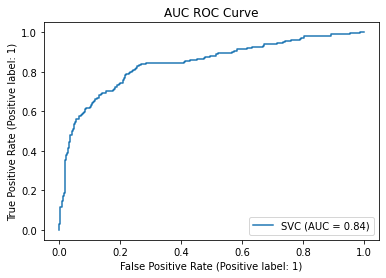

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(best_fit, x_test, y_test)
plt.title("AUC ROC Curve")
plt.show()

Finally we got the accuracy score as 84% and the AUC score is also 84% which is very well good.

## **Saving the model**

In [ ]:
# Saving the Model

import joblib
joblib.dump(best_fit, "Rainfall_weather_forecast.pkl")

['Rainfall_weather_forecast.pkl']

## **Separating Dataset into Feature and Target 'Rainfall' for Prediction**

In [ ]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  RainToday  RainTomorrow  Day  Month  \
0           44.0          13          14          0             0    1     12   
1           44.0           6          15          0             0    2     12   
2           46.0          13          15          0             0    3     12   
3           24.0           9           0          0             0    4     12   
4           41.0           1           7          0             0    5     12   

   Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  Avg_Temp  Avg_Pressure  
0  2008           22.0          46.5   6.251591     19.35       1007.40  
1  2008           13.0          34.5   4.534902     20.75       1009.20  
2  2008           22.5          34.0   3.283311     22.10       1008.15  
3  2008           10.0          30.5   4.534902     22.30       1015.20  
4  2008           13.5          57.5   7.500000     23.75       1008.40

In [ ]:
# Combining x and y for predicting 2nd target.
X = pd.concat([x,y],axis=1)

In [ ]:
X

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0    -1.572870  0.041124 -0.077141  0.534236     0.195503 -0.082709   
1    -1.572870 -1.076281  0.280346 -0.698529     0.195503 -0.082709   
2    -1.572870 -0.051713  0.374368 -0.698529     0.195503 -0.082709   
3    -1.572870 -0.740202  0.722385 -0.698529     0.195503 -0.082709   
4    -1.572870  0.800894  1.327005  0.888946     0.195503 -0.082709   
...        ...       ...       ...       ...          ...       ...   
8420  1.002532 -1.940226  0.005955 -0.698529     0.195503 -0.082709   
8421  1.002532 -1.789278  0.311844 -0.698529     0.195503 -0.082709   
8422  1.002532 -1.450841  0.558307 -0.698529     0.195503 -0.082709   
8423  1.002532 -1.001521  0.573398 -0.698529     0.195503 -0.082709   
8424  1.002532  0.319383  0.081412 -0.698529     0.195503 -0.082709   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  RainToday       Day  \
0        1.160646       0.380260    1.179858    1.349376  -0.556099 -1.893365   
1        1.319872       0.380260   -0.140685    1.552244  -0.556099 -1.710758   
2        1.474872       0.515699    1.179858    1.552244  -0.556099 -1.544131   
3       -0.578373      -1.265782    0.473499   -1.874337  -0.556099 -1.388459   
4        1.160646       0.169468   -1.528740   -0.137530  -0.556099 -1.240995   
...           ...            ...         ...         ...        ...       ...   
8420    -1.843336      -0.614550    0.473499   -1.588620  -0.556099  0.632681   
8421    -0.122677      -1.473608    0.473499   -1.071926  -0.556099  0.733618   
8422    -0.833869      -0.127602    0.473499    1.349376  -0.556099  0.833381   
8423     0.471492      -0.880853    0.659979   -1.071926  -0.556099  0.932033   
8424    -0.833869       0.109734   -1.182868   -1.323889  -0.556099  1.029630   

         Month          Year  Avg_WindSpeed  Avg_Humidity  Avg_Cloud  \
0     1.511409 -3.785861e-13       0.720439     -0.834088   0.820975   
1     1.511409 -3.785861e-13      -0.256648     -1.554871  -0.044404   
2     1.511409 -3.785861e-13       0.769440     -1.584206  -0.641697   
3     1.511409 -3.785861e-13      -0.639112     -1.787793  -0.044404   
4     1.511409 -3.785861e-13      -0.196414     -0.149109   1.478348   
...        ...           ...            ...           ...        ...   
8420 -0.053320  4.493073e-13      -0.379905     -1.377609  -0.044404   
8421 -0.053320  4.493073e-13      -0.507229     -1.318063  -0.044404   
8422 -0.053320  4.493073e-13      -0.776157     -1.318063  -0.044404   
8423 -0.053320  4.493073e-13      -0.639112     -1.377609  -0.997981   
8424 -0.053320  4.493073e-13       0.202961     -0.680274   1.747488   

      Avg_Pressure  RainTomorrow  
0        -1.461738             0  
1        -1.170337             0  
2        -1.340310             0  
3        -0.199654             0  
4        -1.299837             0  
...            ...           ...  
8420      0.971921             0  
8421      0.786182             0  
8422      0.398435             0  
8423      0.244908             0  
8424      0.422674             0  

[6255 rows x 19 columns]

In [ ]:
X= x.drop(['Rainfall'], axis=1)
Y = x['Rainfall']

print(X.shape)
print(Y.shape)

(6255, 17)
(6255,)


In [ ]:
from scipy.stats import zscore

print('High Outliers present')
print((zscore(x)<3).all())

print('Low Outliers Present')
print((zscore(x)>-3).all())

High Outliers present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool
Low Outliers Present
Location         True
MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
WindGustDir      True
WindGustSpeed    True
WindDir9am       True
WindDir3pm       True
RainToday        True
Day              True
Month            True
Year             True
Avg_WindSpeed    True
Avg_Humidity     True
Avg_Cloud        True
Avg_Pressure     True
dtype: bool


## **Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## **Variance Inflation Factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]

vif['features'] = X.columns


# Lets check the values 
vif

vif       features
0   1.591126       Location
1   3.644337        MinTemp
2   3.968600        MaxTemp
3   1.186778    Evaporation
4   1.637787       Sunshine
5   1.544190    WindGustDir
6   1.927823  WindGustSpeed
7   1.276512     WindDir9am
8   1.440392     WindDir3pm
9   1.322082      RainToday
10  1.002228            Day
11  1.140060          Month
12  1.502118           Year
13  2.006008  Avg_WindSpeed
14  2.211998   Avg_Humidity
15  1.793007      Avg_Cloud
16  1.362709   Avg_Pressure

The dataset don't contain any multicollinearity ,that means we have clean dataset.

## **Model Building and Evaluation**

In [ ]:
# Importing important libraries.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Splitting the dataset into Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=25)

## **Linear Regression**

In [ ]:
Lr=LinearRegression()

In [ ]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Lr_pred=Lr.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, Lr_pred, squared=False)
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.4328197759137848


In [ ]:
# R2 score
r2 = r2_score(Y_test, Lr_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)
    

R2 Score is: 80.82312171155499


## **RandomForest Regressor**

In [ ]:
Rf=RandomForestRegressor()
Rf.fit(X_train,Y_train)
Rf_pred=Rf.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, Rf_pred, squared=False)
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.3541391053805988


In [ ]:
# R2 score
r2 = r2_score(Y_test, Rf_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)

R2 Score is: 87.16158258186786


## **XGBRegresssor**

In [ ]:
xb=XGBRegressor(objective ='reg:squarederror')

In [ ]:
xb.fit(X_train,Y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
xb_pred=xb.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, xb_pred, squared=False)
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.40702826839134354


In [ ]:
# R2 score
r2 = r2_score(Y_test, xb_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)

R2 Score is: 83.04050700591526


## **Decision Tree Regressor**

In [ ]:
dr=DecisionTreeRegressor()

In [ ]:
dr.fit(X_train,Y_train)
dr_pred=dr.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, dr_pred, squared=False)
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.4583074602850873


In [ ]:
# R2 score
r2 = r2_score(Y_test, dr_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)

R2 Score is: 78.49806356699835


## **Support Vector Regressor**

In [ ]:
sv=SVR()

In [ ]:
sv.fit(X_train,Y_train)
sv_pred=sv.predict(X_test)

In [ ]:
rmse = mean_squared_error(Y_test, sv_pred, squared=False)
print("Root Mean Square Error is:", rmse)

Root Mean Square Error is: 0.42294219633623614


In [ ]:
# R2 score
r2 = r2_score(Y_test, sv_pred, multioutput='variance_weighted')*100
print("R2 Score is:", r2)

R2 Score is: 81.68842278226354


## **Cross Validation for each model**

In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(Lr, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score for Linear Regression is:", cv_score)

Cross Validation Score for Linear Regression is: 80.08563179729782


In [ ]:
# Cross Validation Score for RandomForest Regressor.
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(Rf, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score for RandomForest Regressor is:", cv_score)

Cross Validation Score for RandomForest Regressor is: 89.43951040574557


In [ ]:
# Cross Validation Score for  XGBRegressor.
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(xb, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score for XGBRegressor is:", cv_score)

Cross Validation Score for XGBRegressor is: 82.92965604496582


In [ ]:
# Cross Validation Score for Decision Tree Regressor.
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(dr, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score for Decision Tree Regressor is:", cv_score)

Cross Validation Score for Decision Tree Regressor is: 78.65184557173316


In [ ]:
# Cross Validation Score Support Vector Regressor
from sklearn.model_selection import cross_val_score
cv_score = (cross_val_score(sv, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score for Support Vector Regressor is:", cv_score)

Cross Validation Score for Support Vector Regressor is: 81.75317644236719


**Comparing all above algorithms, the RandomForest Regressor gives the best results as the difference between R2 Score & Cross Validation Score are least along with least difference in Cross Validation Score and the highest R2 score as compared to all other models,so we are chooseing RandomForest Regressor as our final model**

## **Hyper parameter tuning**

In [ ]:
# Hyper parameter tuning for RandomForest Regressor using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(1,100, 10),
              "n_estimators": np.arange(1,100, 10),
             }

In [ ]:
# Model Training
GCV = GridSearchCV(Rf, param_grid = param_grid)
GCV.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                         'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [ ]:
# getting best parameters.
GCV.best_params_

{'max_depth': 81, 'n_estimators': 81}

In [ ]:
# Predicting the final model using best parameters.

finalize =RandomForestRegressor(max_depth=81,n_estimators=81)
fit_model= finalize.fit(X_train,Y_train)
pred_model=finalize.predict(X_test)

In [ ]:
# Checking the final model's R2 score.

final_r2=r2_score(Y_test,pred_model,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", final_r2)

R2 score for the Best Model is: 87.24260654008862


In [ ]:
# Checking the final model's Cross validation score.


final_cv_score = (cross_val_score(finalize, X_scaled, Y, cv=10).mean())*100
print("Cross Validation Score is:", final_cv_score)

Cross Validation Score is: 89.48290697304115


In [ ]:
# Checking the final model's Root mean square error score.


final_rmse = mean_squared_error(Y_test, pred_model, squared=False)
print("Root Mean Square Error is:", final_rmse)

Root Mean Square Error is: 0.35301984096788497


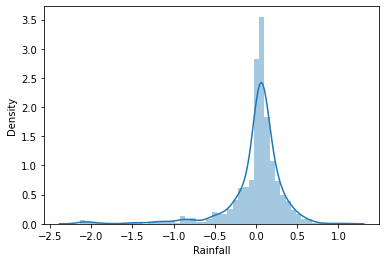

In [ ]:
#checking distribution on the test dataset
sns.distplot(Rf.predict(X_test) - Y_test)

**Finally after hyer parameter tuning, we got the r2 score of approx.87%, cross validation score 89%,RMSE=0.35 which is good enough. so RandomForest regressor is our final model.**

## **Saving the model**

In [ ]:
import joblib
joblib.dump(rf, "Weather_forecast_Regression.pkl")

['Weather_forecast_Regression.pkl']